In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1. divide each product
# 2. Check sales trend to see which product is in a higher demand and which is in lower so that the purchase order is made accordingly
# 3. See check-in trend
# 4. Know when to check in and how much to check in

## Sales Order Analysis 

In [3]:
df_sales = pd.read_csv('BizOps Analyst - Supply Chain Case Study - Sales.csv')

In [29]:
df_sales.head(5)

,Product,Date,Price,Sales,Check-In,month
0,Apples,2020-01-01,45.0,42.0,396.0,1.0
1,Apples,2020-01-02,45.0,37.0,NaN,1.0
2,Apples,2020-01-03,45.0,51.0,NaN,1.0
3,Apples,2020-01-04,45.0,49.0,40.0,1.0
4,Apples,2020-01-05,45.0,49.0,NaN,1.0


### Removing Empty Columns and the 'Assumptions' column 

In [5]:
df_sales=df_sales.drop('Unnamed: 5',axis=1)

In [6]:
df_sales=df_sales.drop('Unnamed: 6',axis=1) 

In [7]:
df_sales=df_sales.drop('Assumptions:',axis=1)

In [8]:
df_sales.head(2)

,Product,Date,Price,Sales,Check-In
0,Apples,1/1/2020,45.0,42.0,396.0
1,Apples,1/2/2020,45.0,37.0,NaN


In [9]:
df_sales.describe()

,Price,Sales,Check-In
count,150.000000,150.000000,22.000000
mean,34.346667,64.813333,536.545455
std,10.766582,37.627704,504.872613
min,24.000000,0.000000,25.000000
25%,24.000000,45.000000,112.500000
50%,29.000000,61.000000,427.000000
75%,47.000000,94.000000,788.000000
max,51.000000,148.000000,1767.000000


From the table above, we can pick a few points:
1. The average Price of the sales dataset is 34.346667, while the minimum is: 24 and maximum is: 51
2. The average Sales of the sales dataset is 64.813333, while the minimum is: 0 and maximum is: 148
3. The average Check-in qty of the sales dataset is 536.545455, while the minimum is: 25 and maximum is: 1767

### Convert the Date to Datetime format and derive months. This Dataset is based on 3 months (Jan-Mar 2020) 

In [10]:
df_sales["Date"] = pd.to_datetime(df_sales["Date"])

In [92]:
df_sales['month'] = df_sales['Date'].dt.month
df_sales.head(5)

,Product,Date,Price,Sales,Check-In,month
0,Apples,2020-01-01,45.0,42.0,396.0,1.0
1,Apples,2020-01-02,45.0,37.0,NaN,1.0
2,Apples,2020-01-03,45.0,51.0,NaN,1.0
3,Apples,2020-01-04,45.0,49.0,40.0,1.0
4,Apples,2020-01-05,45.0,49.0,NaN,1.0


In [25]:
df_sales.month.unique()

array([ 1.,  2.,  3., nan,  5.])

Note: There was an anomaly in the dataset where the value '2020-05-18' might have been accidentally entered. The value will note be considered in the analysis.

### Dividing the dataset into 2 ('Apples' and 'Milk') to get a better understanding of the data

In [30]:
df_sales_apples = df_sales[df_sales['Product']=='Apples'] 

In [31]:
df_sales_milk = df_sales[df_sales['Product']=='Milk'] 

In [34]:
df_sales_apples.describe()

,Price,Sales,Check-In,month
count,75.000000,75.000000,14.000000,75.000000
mean,43.146667,41.026667,248.071429,1.786667
std,8.519760,32.987292,246.181442,0.758614
min,30.000000,0.000000,25.000000,1.000000
25%,30.000000,8.500000,46.750000,1.000000
50%,47.000000,45.000000,195.000000,2.000000
75%,51.000000,54.000000,363.750000,2.000000
max,51.000000,148.000000,847.000000,3.000000


In [35]:
df_sales_milk.describe()

,Price,Sales,Check-In,month
count,75.000000,75.000000,8.000000,75.000000
mean,25.546667,88.600000,1041.375000,1.786667
std,1.961062,24.814447,440.955112,0.758614
min,24.000000,46.000000,540.000000,1.000000
25%,24.000000,69.500000,735.500000,1.000000
50%,24.000000,91.000000,865.000000,2.000000
75%,28.000000,103.500000,1407.000000,2.000000
max,28.000000,136.000000,1767.000000,3.000000


As we can see from the above tables (Apples and Milk):
1. Both the products have an equal count therefore comparisons can be made more fairly

2. The average Price of the apples is 43.146667, while the minimum is: 30 and maximum is: 51
3. The average Price of the milk is 25.546667, while the minimum is: 24 and maximum is: 28

4. The average Sales of the apples is 41.026667, while the minimum is: 0 and maximum is: 148
5. The average Sales of the milk is 88.6, while the minimum is: 46 and maximum is: 136

6. The average qty of check-ins of the apples is 248.071429, while the minimum is: 25 and maximum is: 847
7. The average qty of check-ins of the milk is 1041.375, while the minimum is: 540 and maximum is: 1767

### While the above points show a significant difference between the 2 products, the timeseries below tell a better story 

##### Sales timeseries for Apple and Milk 

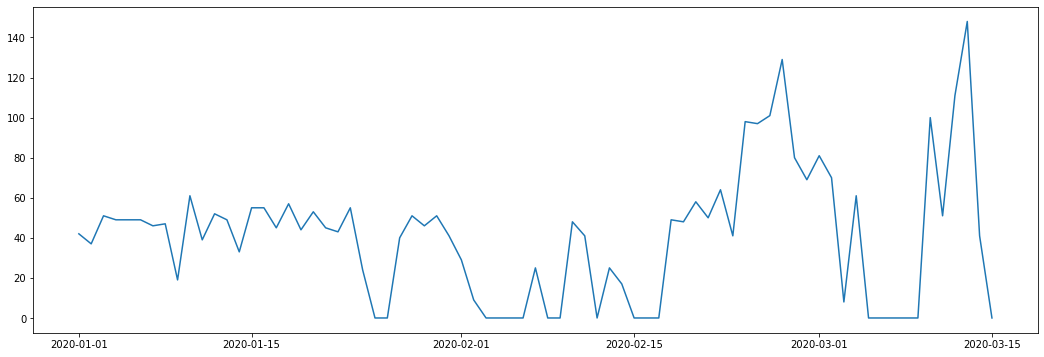

In [41]:
# see trend in sales for apples
plt.figure(figsize=(18,6))
plt.plot(df_sales_apples.Date,df_sales_apples.Sales)
#display plot
plt.show() 

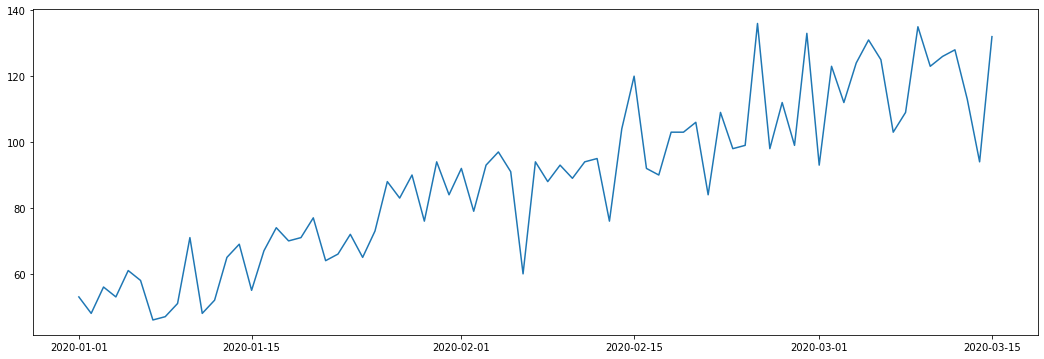

In [42]:
# see trend in sales for milk
plt.figure(figsize=(18,6))
plt.plot(df_sales_milk.Date,df_sales_milk.Sales)
#display plot
plt.show() 

From the above 2 visualisations, it's safe to say that on an average Milk has had better sales than Apples.

##### Price timeseries for Apples and Milk 

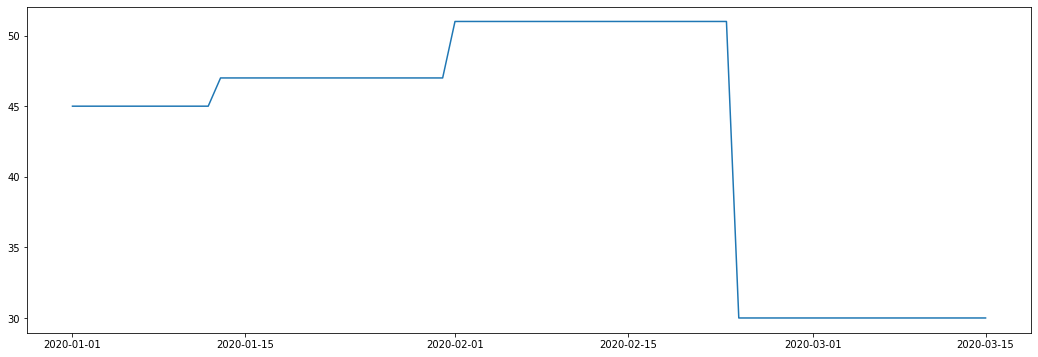

In [43]:
# see trend in price for apples
plt.figure(figsize=(18,6))
plt.plot(df_sales_apples.Date,df_sales_apples.Price)
#display plot
plt.show() 

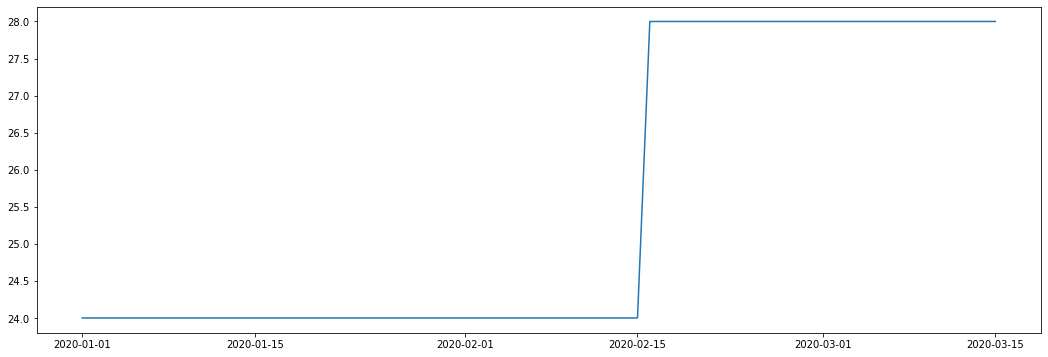

In [44]:
# see trend in price for milk
plt.figure(figsize=(18,6))
plt.plot(df_sales_milk.Date,df_sales_milk.Price)
#display plot
plt.show() 

From the above 2 timeseries for Price, we can see that although apples have had several fluctuations in their price, they have enjoyed a higher price and their lowest price are still higher than the maximum price for milk.
Milk on the other hand had a steady price until half of 2nd month after which the price shot up eventually coming to a (higher) steady price again.

##### Check-ins for Apples and Milk 

<AxesSubplot:xlabel='month'>

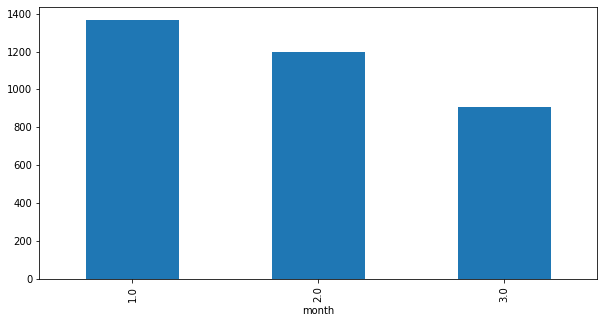

In [51]:
df_sales_apples_check_in = df_sales_apples.groupby([df_sales_apples['month']])['Check-In'].sum()
df_sales_apples_check_in.plot(kind='bar',figsize=(10,5),legend=None)

<AxesSubplot:xlabel='month'>

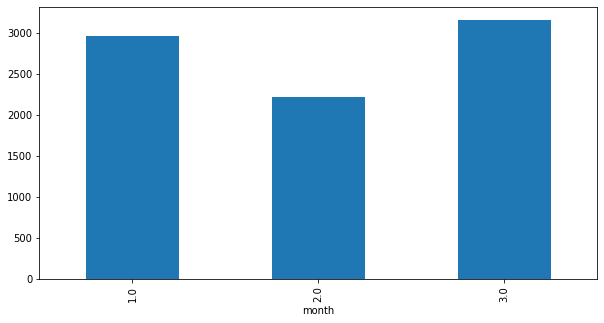

In [53]:
df_sales_milk_check_in = df_sales_milk.groupby([df_sales_milk['month']])['Check-In'].sum()
df_sales_milk_check_in.plot(kind='bar',figsize=(10,5),legend=None)

From the above 2 barplots, we can deduce that:
1. Milk had far greater check-ins than Apples
2. The check-ins for Apples have a steady decline across the months
3. The check-ins for Milk take a dip in the 2nd month but increase again in the 3rd month
4. This compliments the point for sales as the amount of sales for milk is higher compared to that of apples so naturally the amount of check ins for Milk would also be higher

## Purchase Orders Analysis

In [54]:
df_purchase = pd.read_csv('BizOps Analyst - Supply Chain Case Study - Purchase Orders.csv')

In [61]:
df_purchase.head()

,Order Placement Date,Supplier,Product,Ordered Quantity,Delivery Date,Time Taken
0,2019-12-25,AppleFarm,Apples,550,2020-01-01,7 days
1,2019-12-27,AppleFarm,Apples,50,2020-01-04,8 days
2,2020-01-02,AppleFarm,Apples,40,2020-01-07,5 days
3,2020-01-02,AppleFarm,Apples,300,2020-01-10,8 days
4,2020-01-10,AppleFarm,Apples,300,2020-01-14,4 days


## Convert the Date to Datetime format and derive the Time Taken 

In [62]:
df_purchase["Order Placement Date"] = pd.to_datetime(df_purchase["Order Placement Date"])

In [63]:
df_purchase["Delivery Date"] = pd.to_datetime(df_purchase["Delivery Date"])

In [64]:
df_purchase['Time Taken'] = df_purchase['Delivery Date'] - df_purchase['Order Placement Date']

In [65]:
df_purchase.head()

,Order Placement Date,Supplier,Product,Ordered Quantity,Delivery Date,Time Taken
0,2019-12-25,AppleFarm,Apples,550,2020-01-01,7 days
1,2019-12-27,AppleFarm,Apples,50,2020-01-04,8 days
2,2020-01-02,AppleFarm,Apples,40,2020-01-07,5 days
3,2020-01-02,AppleFarm,Apples,300,2020-01-10,8 days
4,2020-01-10,AppleFarm,Apples,300,2020-01-14,4 days


In [66]:
df_purchase.describe()

,Ordered Quantity,Time Taken
count,22.000000,22
mean,610.454545,5 days 18:32:43.636363636
std,524.508634,2 days 14:49:01.158077479
min,40.000000,1 days 00:00:00
25%,150.000000,4 days 06:00:00
50%,575.000000,5 days 00:00:00
75%,800.000000,6 days 18:00:00
max,1900.000000,13 days 00:00:00


### Getting the total ordered quantity per product 

In [89]:
df_purchase_product_ord_qty = df_purchase.groupby(['Product'])['Ordered Quantity'].sum()
df_purchase_product_ord_qty.nlargest()

Product
Milk      8700
Apples    4730
Name: Ordered Quantity, dtype: int64

<AxesSubplot:xlabel='Product'>

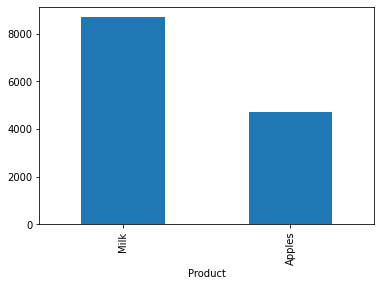

In [90]:
df_purchase_product_ord_qty.nlargest().plot(kind='bar')

From the visualisation above we can see that:
1. Milk was ordered in a far greater quantity than apples.
2. This compliments the point of milk making more sales.

### Dividing the dataset into 2 ('Apples' and 'Milk') to get a better understanding of the data 

In [67]:
df_purchase_apples = df_purchase[df_purchase['Product']=='Apples'] 

In [68]:
df_purchase_apples.describe()

,Ordered Quantity,Time Taken
count,14.000000,14
mean,337.857143,5 days 22:17:08.571428571
std,331.388189,3 days 07:01:13.352621380
min,40.000000,1 days 00:00:00
25%,62.500000,4 days 00:00:00
50%,300.000000,5 days 00:00:00
75%,487.500000,7 days 18:00:00
max,1100.000000,13 days 00:00:00


In [70]:
df_purchase_milk = df_purchase[df_purchase['Product']=='Milk'] 

In [71]:
df_purchase_milk.describe()

,Ordered Quantity,Time Taken
count,8.00000,8
mean,1087.50000,5 days 12:00:00
std,461.17087,0 days 12:49:42.742602466
min,600.00000,5 days 00:00:00
25%,775.00000,5 days 00:00:00
50%,900.00000,5 days 12:00:00
75%,1425.00000,6 days 00:00:00
max,1900.00000,6 days 00:00:00


As we can see from the above table:
1. The average Ordered Quantity is 610.454545, while the minimum is: 40 and maximum is: 1900 and count is: 22
2. The average Time Taken is 5 days, while the minimum is: 1 day and maximum is: 13 days

3. The average Ordered Quantity for Apples is 337.857143, while the minimum is: 40 and maximum is: 1100 and count is: 14
4. The average Time Taken for Apples is 5 days, while the minimum is: 1 day and maximum is: 13 days

5. The average Ordered Quantity for Milk is 1087.5, while the minimum is: 600 and maximum is: 1900 and count is: 8
6. The average Time Taken for Milk is 5 days, while the minimum is: 5 day and maximum is: 6 days

<AxesSubplot:>

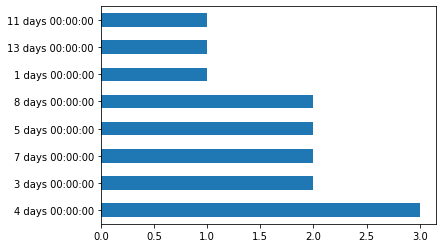

In [75]:
df_purchase_apples['Time Taken'].value_counts().plot(kind='barh')

<AxesSubplot:>

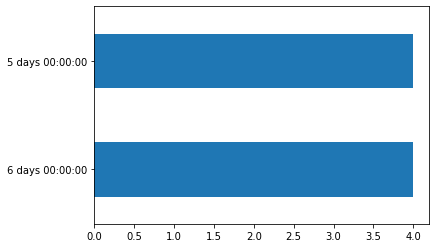

In [76]:
df_purchase_milk['Time Taken'].value_counts().plot(kind='barh')

From the above bar plots we can deduce that:
1. The average time taken for milk to be delivered was 5 to 6 days
2. The apples were mostly delivered in 4 days